### 8.3 그래프 예제 1

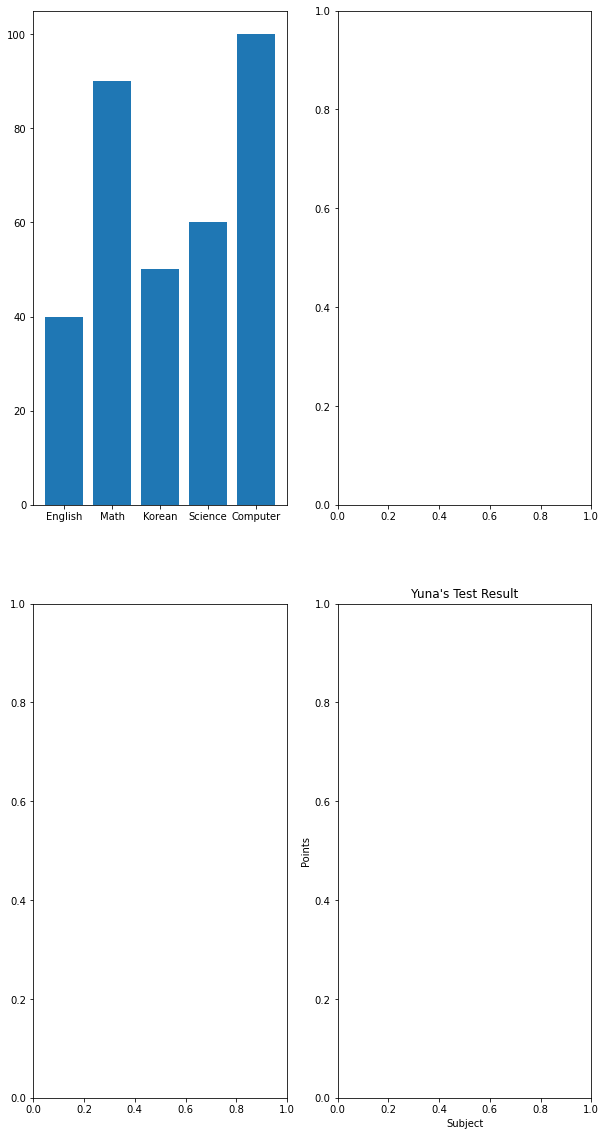

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure(figsize=(10,20))               # 그래프 객체 생성 -> <Figure size 432x288 with 0 Axes>
ax1 = fig.add_subplot(2,2,1)     # figure()객체에 축 그리기(add_subplot)
ax2 = fig.add_subplot(2,2,2)     # add_subplot(행 개수,열 개수,위치)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 그래프 그리기
ax1.bar(subject, points)         # bar(X축 데이터,Y축 데이터)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                            # 그래프를 화면으로 출력

-----

### 8.4 그래프 예제 2 

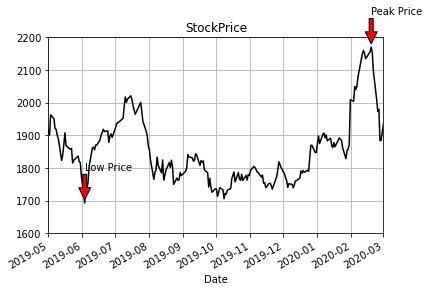

In [92]:
from datetime import datetime
import pandas as pd
import os

#그래프 데이터 
csv_path = "AMZN.csv"
data = pd.read_csv(csv_path ,index_col=0, parse_dates=True)
price = data['Close']          # Pandas Series

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)          # metaplotlib의 공간 
price.plot(ax=ax, style='black')     # Pandas plot 
plt.ylim([1600,2200])
plt.xlim(['2019-05-01','2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"),(datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), #주석을 달 좌표(x,y)
                xytext=(d,price.asof(d)+100), #주석 텍스트가 위차할 좌표(x,y)
                arrowprops=dict(facecolor='red')) #화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

### Pandas 그래프
* Series: 선 그래프 그리는 최적의 자료구조   
```price = data['Close']```
* plot   
```price.plot(ax=ax, style='black')```


### 좌표축 설정
```plt.xlim()```, ```plt.ylim()```을 통해 x,y좌표축의 범위 설정

### 주석
```annotate()``` 그래프 안에 주석(글자, 화살표 등) 삽입   
그래프 그리기의 고급 기법!

### 그리드(격자눈금)
```grid()``` 로 추가

-----
### 8.5 그래프 예제 1

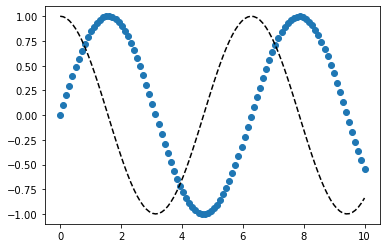

In [22]:
import numpy as np
x = np.linspace(0, 10, 100) #0에서 10까지 균등한 간격으로  100개의 숫자를 만들라는 뜻입니다.
plt.plot(x, np.sin(x),'o')
plt.plot(x, np.cos(x),'--', color='black') 
plt.show()

#### ```plt.plot()```
* matplotilb이 가장 최근의 ```figure```객체와 그 ```subplot```을 그린다.   
  만약 서브플롯이 없으면 새로 하나 생성
* ```plt.plot(x데이터, y데이터, 마커옵션, 색상 등)``` 
* ```plt.subplot``` 으로 서브플롯 추가 

### 8.5 그래프 예제 2

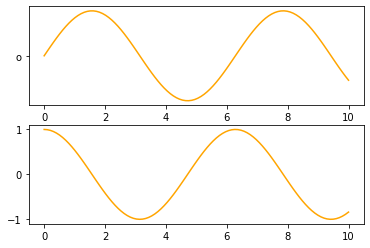

In [23]:
x = np.linspace(0, 10, 100) 

plt.subplot(2,1,1)
plt.plot(x, np.sin(x),'orange', 'o')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange') 
plt.show()

### 8.5 그래프 예제 3 -linestyle, marker 옵션

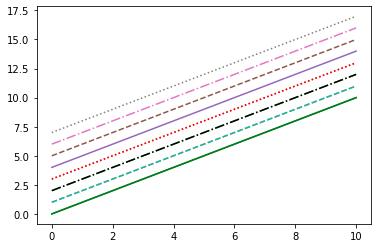

In [24]:
x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

### Pandas 그래프 그리기 - ```plot()```
#### matplotlib과 연계하여 사용하자

#### pandas.plot메서드의 인자
* **label:** 그래프의 범례이름.
* **ax:** 그래프를 그릴 matplotlib의 서브플롯 객체.
* **style:** matplotlib에 전달할 'ko--'같은 스타일의 문자열
* **alpha:** 투명도 (0 ~1)
* **kind:** 그래프의 종류: line, bar, barh, kde
* **logy:** Y축에 대한 로그스케일
* **use_index:** 객체의 색인을 눈금 이름으로 사용할지의 여부
* **rot:** 눈금 이름을 로테이션(0 ~ 360)
* **xticks, yticks:** x축, y축으로 사용할 값
* **xlim, ylim:** x축, y축 한계
* **grid:** 축의 그리드 표시할 지 여부

#### pandas의 data가 DataFrame일때 plot 메서드 인자
* **subplots:** 각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.
* **sharex:** subplots=True면 같은 X축을 공유하고 눈금과 한계를 연결한다.
* **sharey:** subplots=True면 같은 Y축을 공유한다.
* **figsize:** 그래프의 크기, 튜플로 지정
* **title:** 그래프의 제목을 문자열로 지정
* **sort_columns:** 칼럼을 알파벳 순서로 그린다.

### 8.5 그래프 예제 4

<AxesSubplot:>

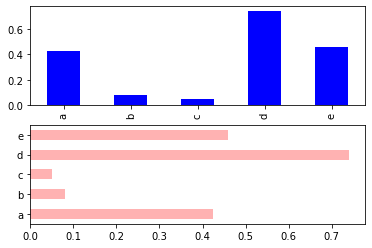

In [25]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)

### 8.5 그래프 예제 5

<AxesSubplot:>

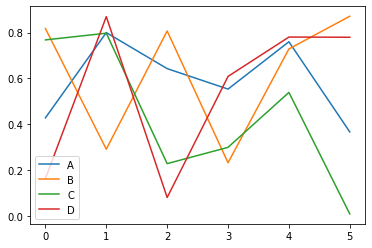

In [31]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')

-----
### 8-7 그래프예제 - Seaborn

In [33]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

In [34]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
df.shape

(244, 7)

In [36]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### 결측 값이 없어서 결측값 처리 불필요 

#### category형 데이터
```sex```, ```smoker```, ```day```, ```time```, ```size```(테이블 인원을 뜻하므로 여기선 범주형 )

#### 수치형 데이터
```tips```, ```total_bill```

In [39]:
### 범주형 변수의 카테고리별 개수 알아보기 

print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


-----


## 범주형 데이터 - 막대 그래프
* 가로
* 세로
* 누적
* 그룹화된 막대그래프

예제에선 ```sex```, ```smoker```, ```day```, ```time```, ```size```

### 1. 막대 그래프   
#### 방법 1: Pandas와 Matplotlib을 활용 - copmplex way

**Pandas데이터를 아래의 형태로 각각 나눠줘야 한다.**
* x에 series, list
* y에 list

In [40]:
#df의 첫 5행을 확인해봅시다. 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
# tip컬럼을 성별에 대한 평균으로 나타내기
grouped = df['tip'].groupby(df['sex']) # tip컬럼을 'sex'를 기준으로 groupby한다
grouped.mean() # 성별에 따른 팁의 평균

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [42]:
grouped.size() # 성별에 따른 데이터 량(팁 횟수)

sex
Male      157
Female     87
Name: tip, dtype: int64

#### 성별에 따른 팁 액수의 평균을 막대그래프로 나타내기

In [43]:
import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 바꿔줍니다.
sex

{'Male': 3.0896178343949052, 'Female': 2.833448275862069}

In [44]:
x = list(sex.keys())  
x

['Male', 'Female']

In [45]:
y = list(sex.values())
y

[3.0896178343949052, 2.833448275862069]

No handles with labels found to put in legend.


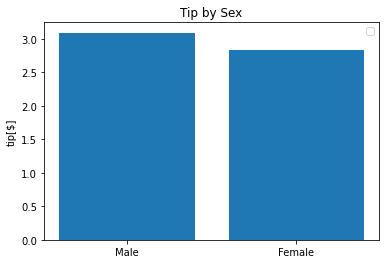

In [46]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')
plt.legend()

#### 방법 2: Seaborn과 Matplotlib - simple way

<AxesSubplot:xlabel='sex', ylabel='tip'>

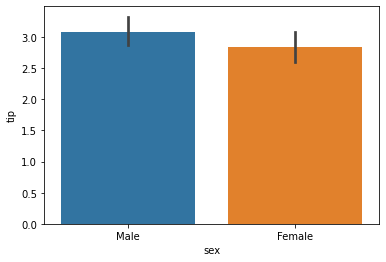

In [48]:
# 성별에 대한 tip 평균 그래프 그리기
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by sex')

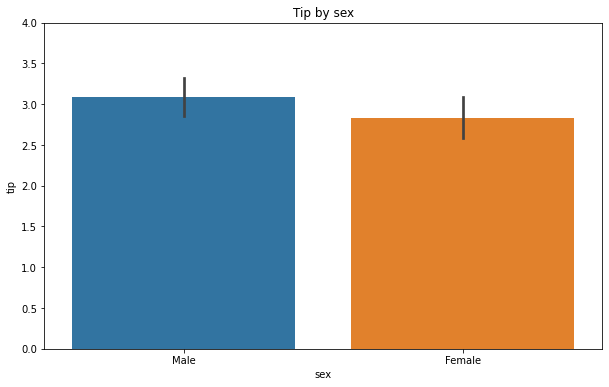

In [49]:
# Matplotlib과 함께 사용

plt.figure(figsize=(10,6)) # 도화지 사이즈를 정합니다.
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

Text(0.5, 1.0, 'Tip by day')

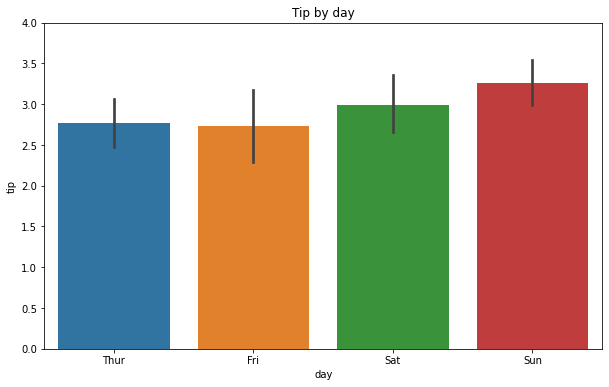

In [51]:
# 요일에 따른 tip 그래프

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

<AxesSubplot:xlabel='day', ylabel='tip'>

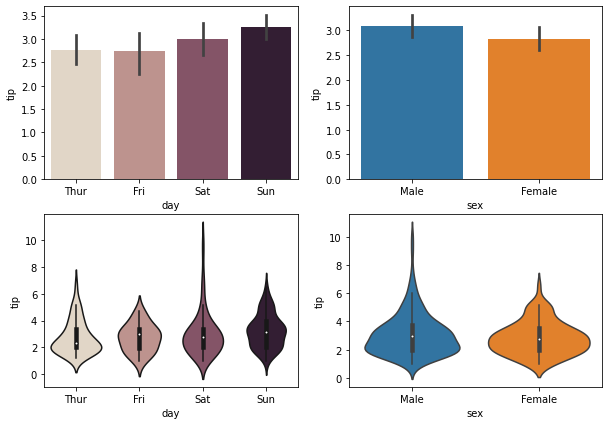

In [53]:
# violineplot 사용
# 범주형 그래프를 다루기 좋다!

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip',palette="ch:.25")   # palette 옵션으로 색 디테일하게 지정

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip',palette="ch:.25")

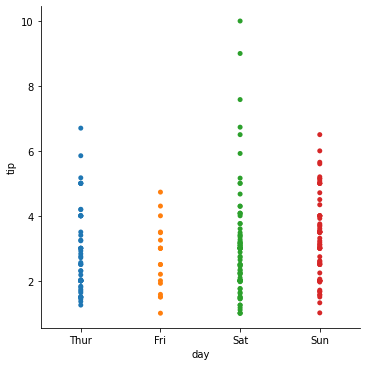

In [56]:
# catplot 사용하기
sns.catplot(x="day", y="tip", jitter=False, data=tips)

-----

## 수치형 데이터 - 산점도 / 선 그래프

### 산점도(scatter plot)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

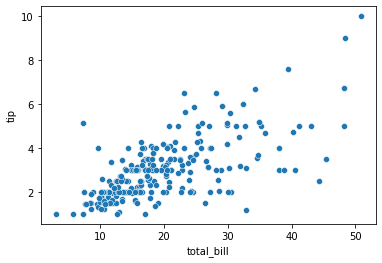

In [57]:
# hue인자에 'day'를 주어 요일에 따른 tip과 total_bill의 관계 시각화
sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

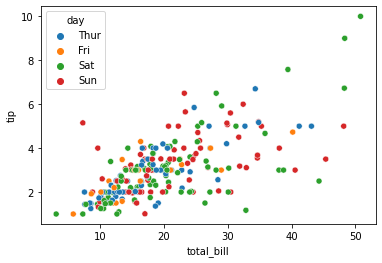

In [58]:
sns.scatterplot(data=df , x='total_bill', y='tip', hue='day')

### 선그래프(line graph)

### plot의 default

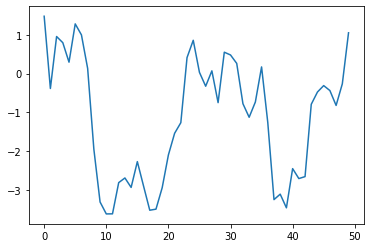

In [59]:
#np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다. 
#cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())

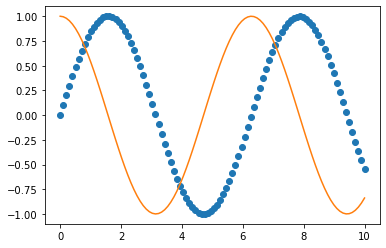

In [60]:
# 8-5의 선그래프 예제
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x)) 
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

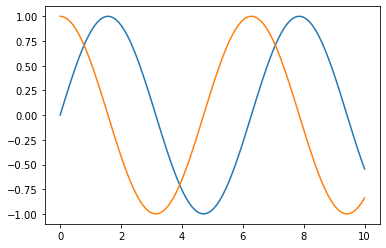

In [61]:
# Seaborn활용
sns.lineplot(x, np.sin(x))
sns.lineplot(x, np.cos(x))

### 히스토그램
**도수분포표를 그래프로 나타낸 것**

**↔가로축**   

* 계급: 변수의 구간, bin (or bucket)

**↕세로축**

* 도수: 빈도수, frequency

**전체 총량: n**


#### 아래 데이터의 히스토그램
* x1: 평균 100, 표준편차 15인 정규분포 따름.
* x2: 평균 130, 표준편차 15인 정규분포 따름.
* 도수를 50개 구간으로 표시, 확률 밀도가 아닌 빈도로 표시

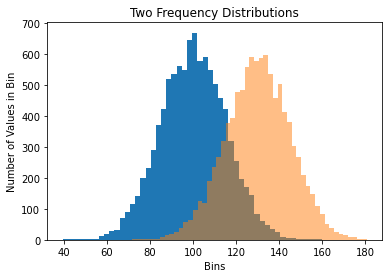

In [63]:
#그래프 데이터 
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False) #bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom') # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left') #y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

### tips 데이터의 히스토그램 

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


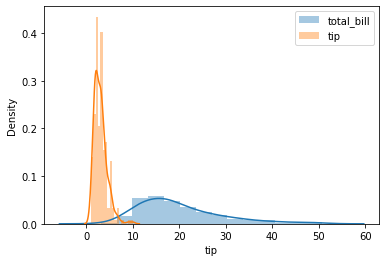

In [66]:
# total_bill과 tips 에 대한 히스토그램

sns.distplot(df['total_bill'], label = "total_bill")
sns.distplot(df['tip'], label = "tip").legend()# legend()를 이용하여 label을 표시해 줍니다.

<AxesSubplot:>

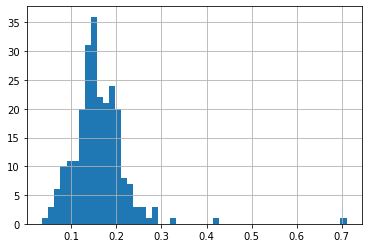

In [65]:
# 전체 결제 금액 대비 팁의 비율
df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins=50)

<AxesSubplot:ylabel='Density'>

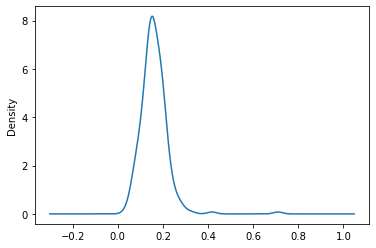

In [67]:
# kind = 'kda' 사용해 확률 밀도 그래프로 나타내기
# KDE(Kernel Density Estimate) 커널밀도추정 그래프!
df['tip_pct'].plot(kind='kde')

### 밀도 그래프: 연속된 확률분포를 나타낸다
* ```kernels```메서드를 섞어서 이 부포를 근사하는 식으로 그리는게 일반적
* 친숙한(^^) 정규분포(가우시안)로 나타낼 수 있다.

-----
## 8-10 시계열 데이터 시각화

### 1949년-1960년도 비행기 탑승객 예제 데이터

In [82]:
# 데이터 DataFrame객체로 만들기
print(os.listdir('.'))
csv_path = 'flights.csv'
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

['.ipynb_checkpoints', 'barplot.png', 'flights.csv', 'multiprocessing.ipynb', 'python_graph.ipynb', '시그마,평균,중앙값,표준편차.ipynb']


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

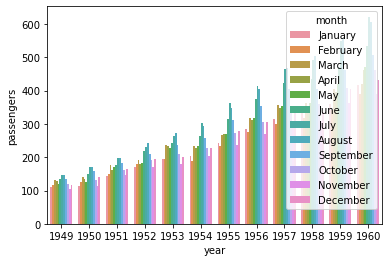

In [101]:
# barplot
sns.barplot(data=flights, x='year', y='passengers', hue='month')

<AxesSubplot:xlabel='year', ylabel='passengers'>

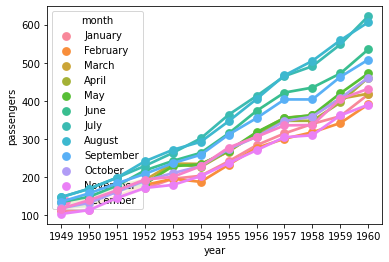

In [94]:
# pointplot
sns.pointplot(data=flights, x='year', y='passengers', hue='month')

<AxesSubplot:xlabel='year', ylabel='passengers'>

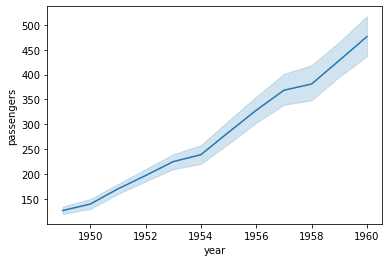

In [85]:
# lineplot
sns.lineplot(data=flights, x='year', y='passengers')

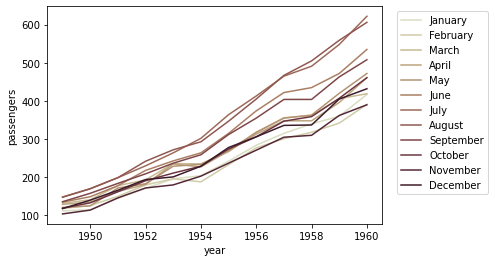

In [86]:
# hue 인자에 'month'할당해 달별로 나누기
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

-----
### Heatmap
* 방대한 양의 데이터와 현상을 수치에 따른 색상으로 나타내는 것 
* 2차원으로 시각화하여 표현(데이터 차원에 대한 제한은 없음)

### Heatmap을 위한 데이터 피봇(pivot)
어떤 축과 점을 기준으로 데이터 표를 재배치하는 것

### pandas.DataFrame.pivot()

In [89]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<AxesSubplot:xlabel='month', ylabel='year'>

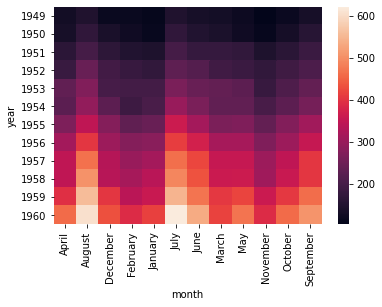

In [88]:
sns.heatmap(pivot)

<AxesSubplot:xlabel='month', ylabel='year'>

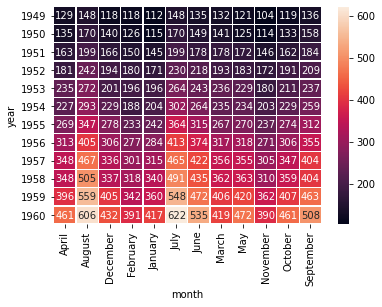

In [90]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

<AxesSubplot:xlabel='month', ylabel='year'>

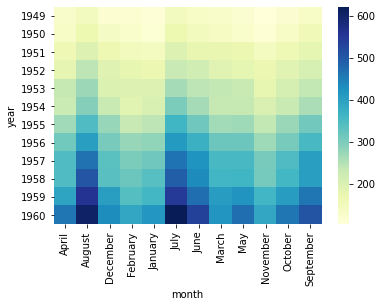

In [91]:
sns.heatmap(pivot, cmap="YlGnBu")